In [29]:
from keras.datasets import reuters

In [31]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [33]:
train_labels[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [35]:
train_data.shape, test_data.shape

((8982,), (2246,))

In [37]:
test_data.shape

(2246,)

In [39]:
from keras import layers
from keras import models

In [41]:
len(train_data[0])

87

In [42]:
len(train_data[1])

56

In [43]:
word_index = reuters.get_word_index()

In [44]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [45]:
reverse_word_index = { index:word for word, index in word_index.items() }

In [46]:
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [47]:
' '.join([reverse_word_index.get(x-3, '?') for x in train_data[0]])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [48]:
import numpy as np

In [49]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [50]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [51]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [52]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test  = to_categorical(test_labels)


In [53]:
len(y_train[0]) # 46 categories

46

In [54]:
x_train.shape

(8982, 10000)

In [55]:
x_val = x_train[:1000]
y_val = y_train[:1000]
partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [56]:
network = models.Sequential()

network.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))

network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
history = network.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=[x_val, y_val])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 120us/step - loss: 3.2635 - acc: 0.4116 - val_loss: 2.4788 - val_acc: 0.5350
Epoch 2/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.9792 - acc: 0.5734 - val_loss: 1.6428 - val_acc: 0.6210
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.3944 - acc: 0.6974 - val_loss: 1.3561 - val_acc: 0.7080
Epoch 4/20
7982/7982 [==============================] - 1s 92us/step - loss: 1.1030 - acc: 0.7588 - val_loss: 1.1956 - val_acc: 0.7400
Epoch 5/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.8870 - acc: 0.8083 - val_loss: 1.0838 - val_acc: 0.7600
Epoch 6/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.7095 - acc: 0.8477 - val_loss: 0.9994 - val_acc: 0.7880
Epoch 7/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.5643 - acc: 0.8804 - val_loss: 0.9493 - val_acc: 0.7970
Epoch 

In [58]:
network.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 92us/step


[1.13796149102684, 0.7894033838199487]

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [61]:
history_dict = history.history

In [62]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [63]:
epochs = range(1, len(loss_values)+1)

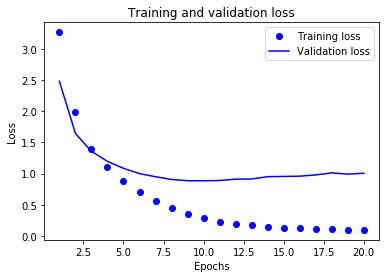

In [64]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [65]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

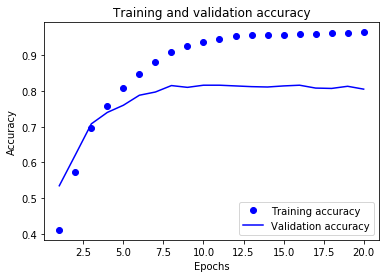

In [66]:
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [67]:
predictions = network.predict(x_test)

In [68]:
predictions[0].argmax()

3